In [1]:
simple_renderer = {
  "renderer": {
    "type": "simple",
    "symbol": {
      "color": [
        0,
        0,
        128,
        128
      ],
      "size": 15,
      "angle": 0,
      "xoffset": 0,
      "yoffset": 0,
      "type": "esriSMS",
      "style": "esriSMSCircle",
      "outline": {
        "color": [
          0,
          0,
          128,
          255
        ],
        "width": 0.99975,
        "type": "esriSLS",
        "style": "esriSLSSolid"
      }
    }
  }
}

In [2]:
heatmap_renderer = {"renderer":"HeatmapRenderer", "opacity": 0.75}

In [3]:
classed_size_renderer = { "renderer": "ClassedSizeRenderer", "field_name":"TOTAL_FATALITIES"}

In [4]:
classed_color_renderer = {"renderer":"ClassedColorRenderer","field_name": "SHOT_MADE_FLAG"}

In [5]:
from arcgis.gis import GIS

In [41]:
gis = GIS("https://slustl.maps.arcgis.com/home", "emmaleeblackwood")

Enter password: ········


In [7]:
acled = gis.content.search("ACLED", item_type="feature service", outside_org=True)

In [8]:
acled

[<Item title:"acled2" type:Feature Layer Collection owner:slibby_dbsne>,
 <Item title:"Mali_SIGACTS_AQIM_20170224_ACLED" type:Feature Layer Collection owner:Tesla_Government>,
 <Item title:"Mali_SIGACTS_CMA_20170224_ACLED" type:Feature Layer Collection owner:Tesla_Government>,
 <Item title:"SAregional_ACLED_v6 (2)" type:Feature Layer Collection owner:mnajarro_usaid>,
 <Item title:"ACLED_AF" type:Feature Layer Collection owner:HeathermanK>,
 <Item title:"my_acled_demooooo" type:Feature Layer Collection owner:jake.brinkman>,
 <Item title:"périmètre urbain el houche acl" type:Feature Layer Collection owner:leptitkid1>,
 <Item title:"Armed_Conflict_Location_Event_Data_ACLED - ACLED_live" type:Feature Layer Collection owner:anthony.amodei_afdcgs>,
 <Item title:"acled_summary_Jul2018" type:Feature Layer Collection owner:dio.dafrista_UNWFP>,
 <Item title:"COD_incidents" type:Feature Layer Collection owner:mattia.pinzone_UNWFP>]

<Item title:"acled2" type:Feature Layer Collection owner:slibby_dbsne>
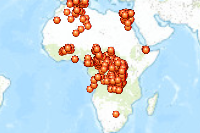

In [9]:
acled[0]

In [10]:
map1 = gis.map("Africa")
map1

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [14]:
map1.add_layer(acled[0], simple_renderer)

In [16]:
map2 = gis.map("Africa")
map2

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [17]:
map2.add_layer(acled[0], classed_size_renderer)

In [18]:
classed_color_renderer = {"renderer":"ClassedColorRenderer","field_name": "EVENT_TYPE"}

In [19]:
map4 = gis.map("Lagos, Nigeria")
map4

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [20]:
map4.add_layer(acled[0], classed_color_renderer)

In [21]:
webmap_item_properties = {'title':'ACLED Simple Renderer',
                         'snippet':'ACLED',
                         'tags':['ACLED']}

map1.save(webmap_item_properties)#, thumbnail='./webmap_thumbnail.png')

<Item title:"ACLED Simple Renderer" type:Web Map owner:emmaleeblackwood>

In [22]:
from arcgis.geocoding import Geocoder, get_geocoders


In [23]:
single_line_address = "6224 Milbrook Road, Brentwood, TN 37027"

In [24]:
my_map = gis.map("Brentwood, TN")

In [25]:
my_map

MapView(basemaps=['dark-gray', 'dark-gray-vector', 'gray', 'gray-vector', 'hybrid', 'national-geographic', 'oc…

In [26]:
from arcgis.geocoding import geocode

In [27]:
home = geocode(single_line_address)[0]
popup = { 
    "title" : "Home", 
    "content" : home['address']
    }
my_map.draw(home['location'], popup)

In [28]:
csv_file = "chennai-rainfall.csv"

In [32]:
csv_item = gis.content.add({"title" : "Emma's Rainfall"}, csv_file)

Item 'chennai-rainfall.csv' already exists.


RuntimeError: Item 'chennai-rainfall.csv' already exists.
(Error Code: 409)

In [30]:
csv_item

<Item title:"chennai-rainfall" type:CSV owner:emmaleeblackwood>

In [31]:
csv_layer = csv_item.publish(None, {"Address":"LOCATION"})

KeyError: 'error'

In [33]:
map.add_layer(csv_layer, simpler_renderer)

AttributeError: type object 'map' has no attribute 'add_layer'

In [44]:
from arcgis.gis import *

In [45]:
gis.users.search("Emma")

[<User username:emmaleeblackwood>]

In [46]:
emma = gis.users.search("Emma")[0]

In [47]:
emma.update(thumbnail = 'koala.gif')

True

<User username:emmaleeblackwood>
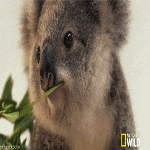

In [48]:
emma